In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

df=pd.read_csv('Clean_Dataset.csv')
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Take only last and first 10000 row
df = pd.concat([df.tail(10000), df.head(10000)], axis=0)
# A Quick Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.0+ MB


In [5]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [94]:
print('Missing value:')
df.isna().sum()

 

Missing value:


airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [95]:
# Check whether there is a duplicated value or not
print('Duplicated value:')
df.duplicated().sum()

Duplicated value:


0

In [97]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.244353,26.017100,30318.009000
std,7.278360,13.693753,25822.290585
min,1.000000,1.000000,2281.000000
25%,6.500000,14.000000,5301.000000
50%,11.500000,26.000000,21337.500000
75%,16.500000,38.000000,54896.000000
max,45.830000,49.000000,114704.000000


In [98]:
df.shape

(20000, 11)

In [100]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Air_India    83
Indigo       64
Vistara      54
GO_FIRST     50
SpiceJet     19
AirAsia      16
Name: count, dtype: int64

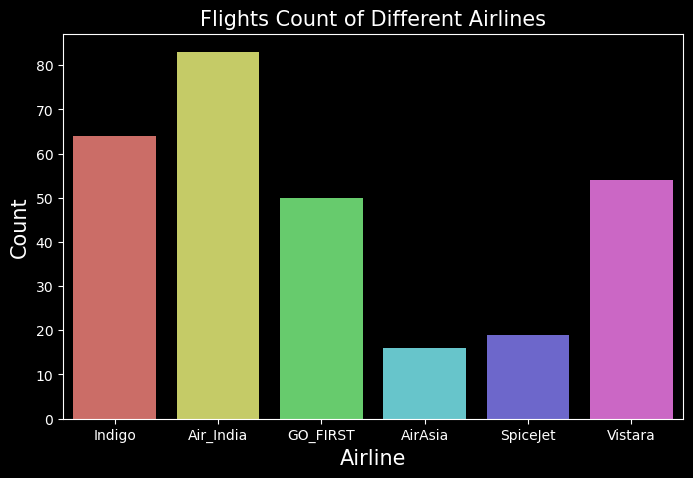

In [101]:
plt.figure(figsize=(8,5))
sns.countplot(x='airline', data=df1, palette='hls')
plt.title('Flights Count of Different Airlines', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()


In [12]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     267
Business     20
Name: count, dtype: int64

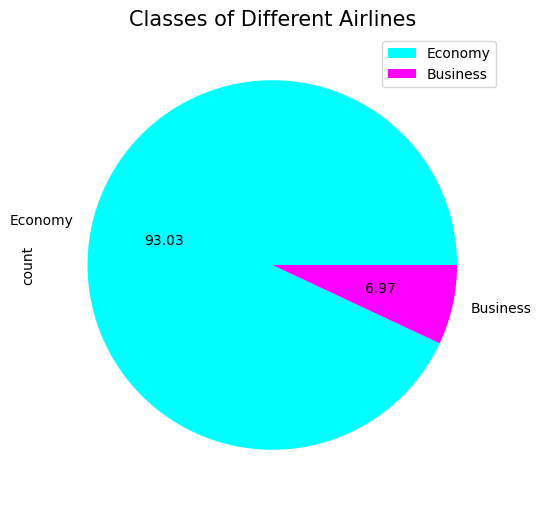

In [13]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

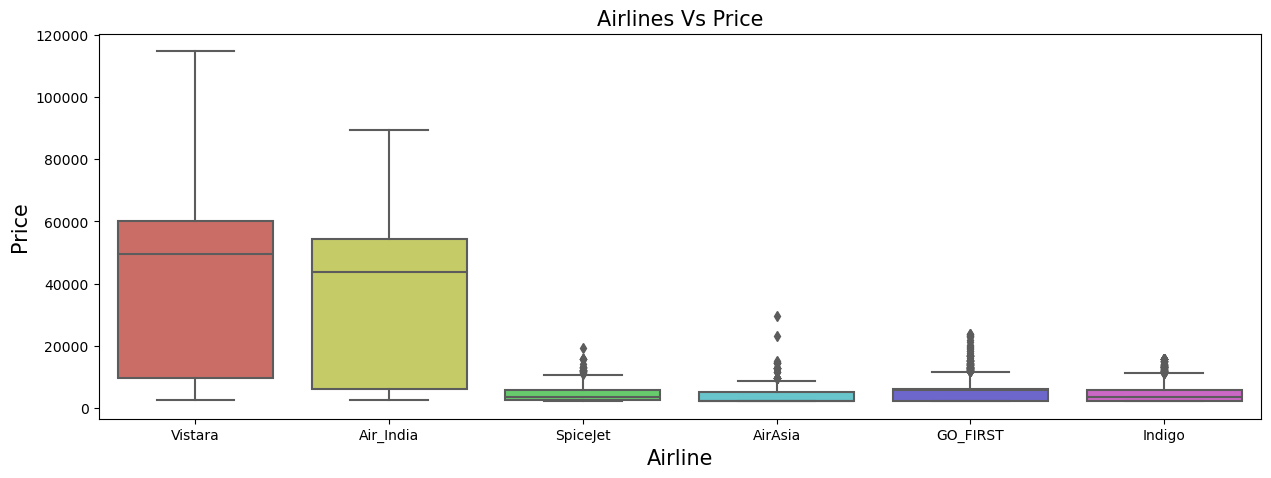

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

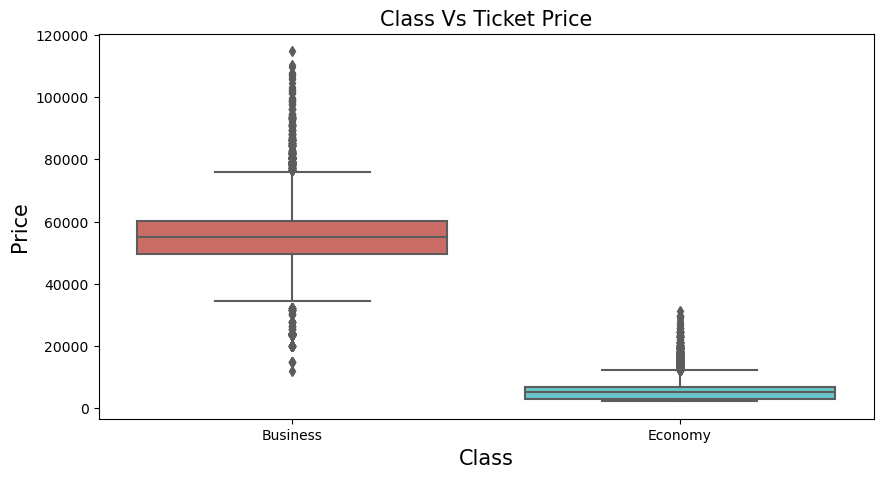

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

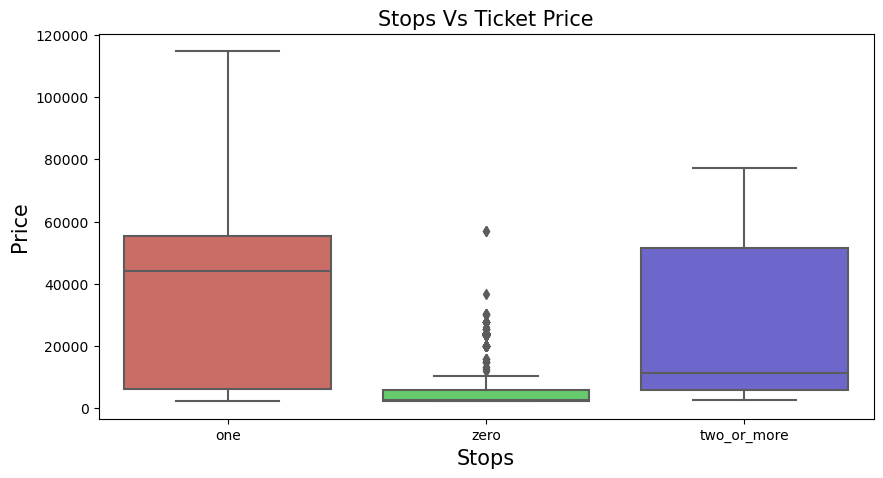

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

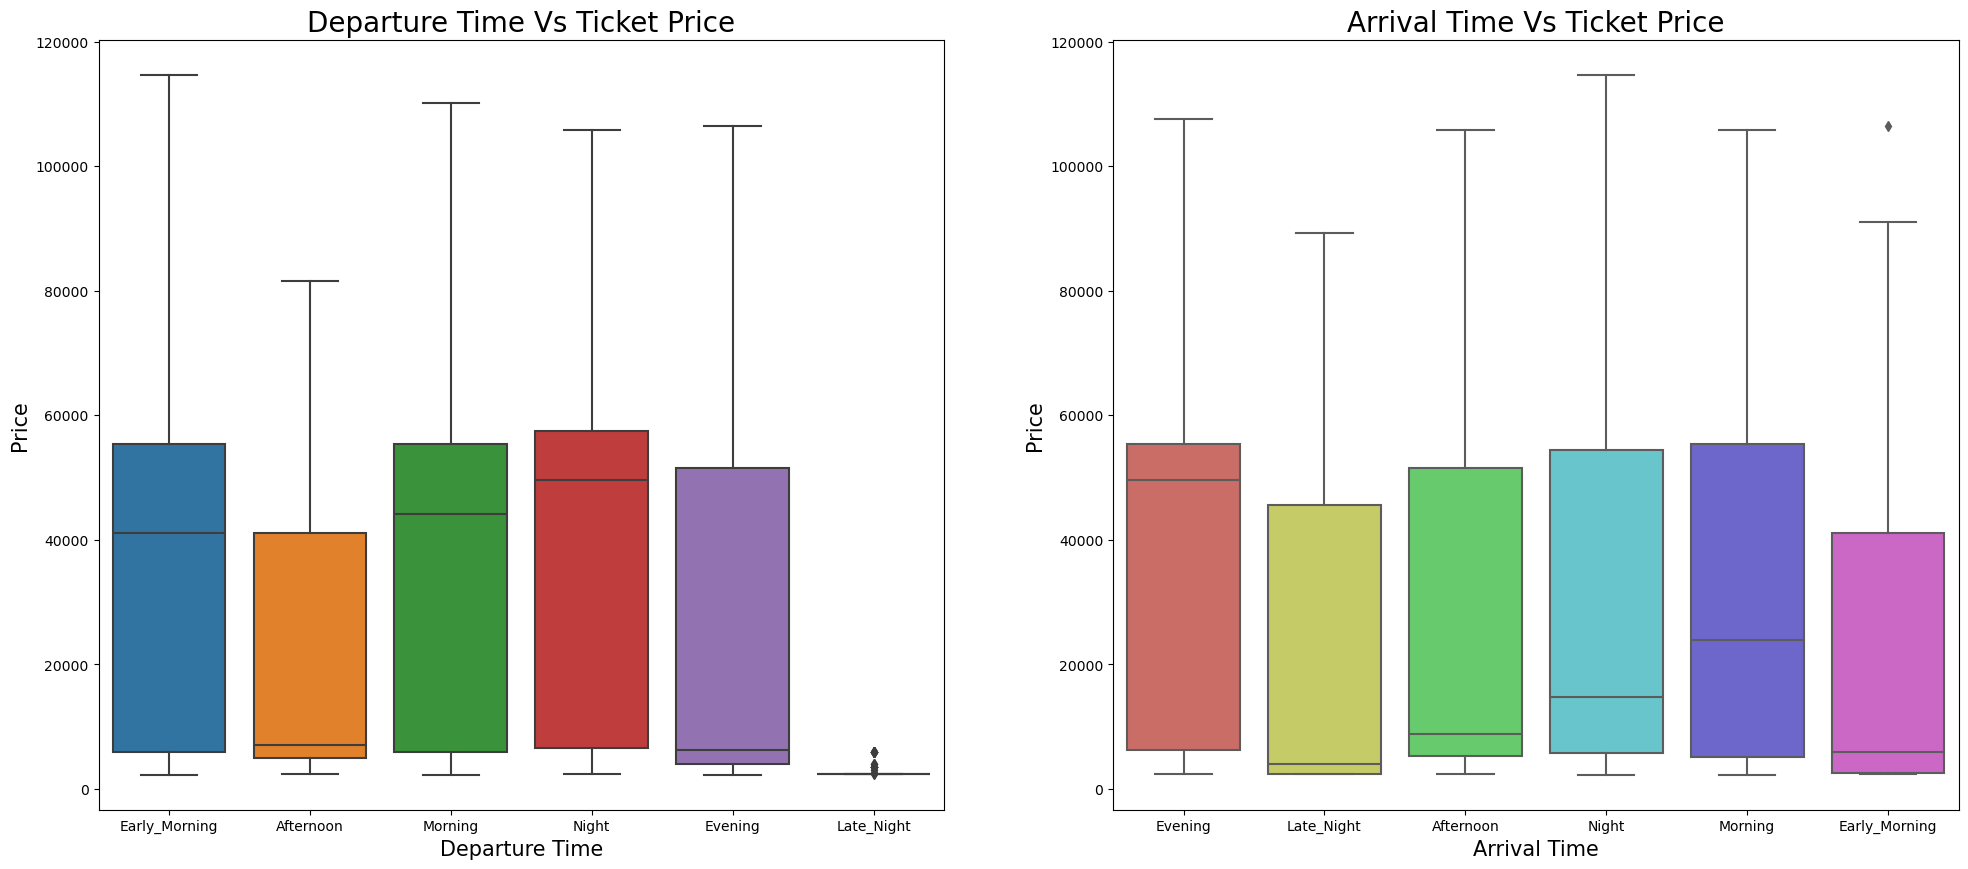

In [44]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

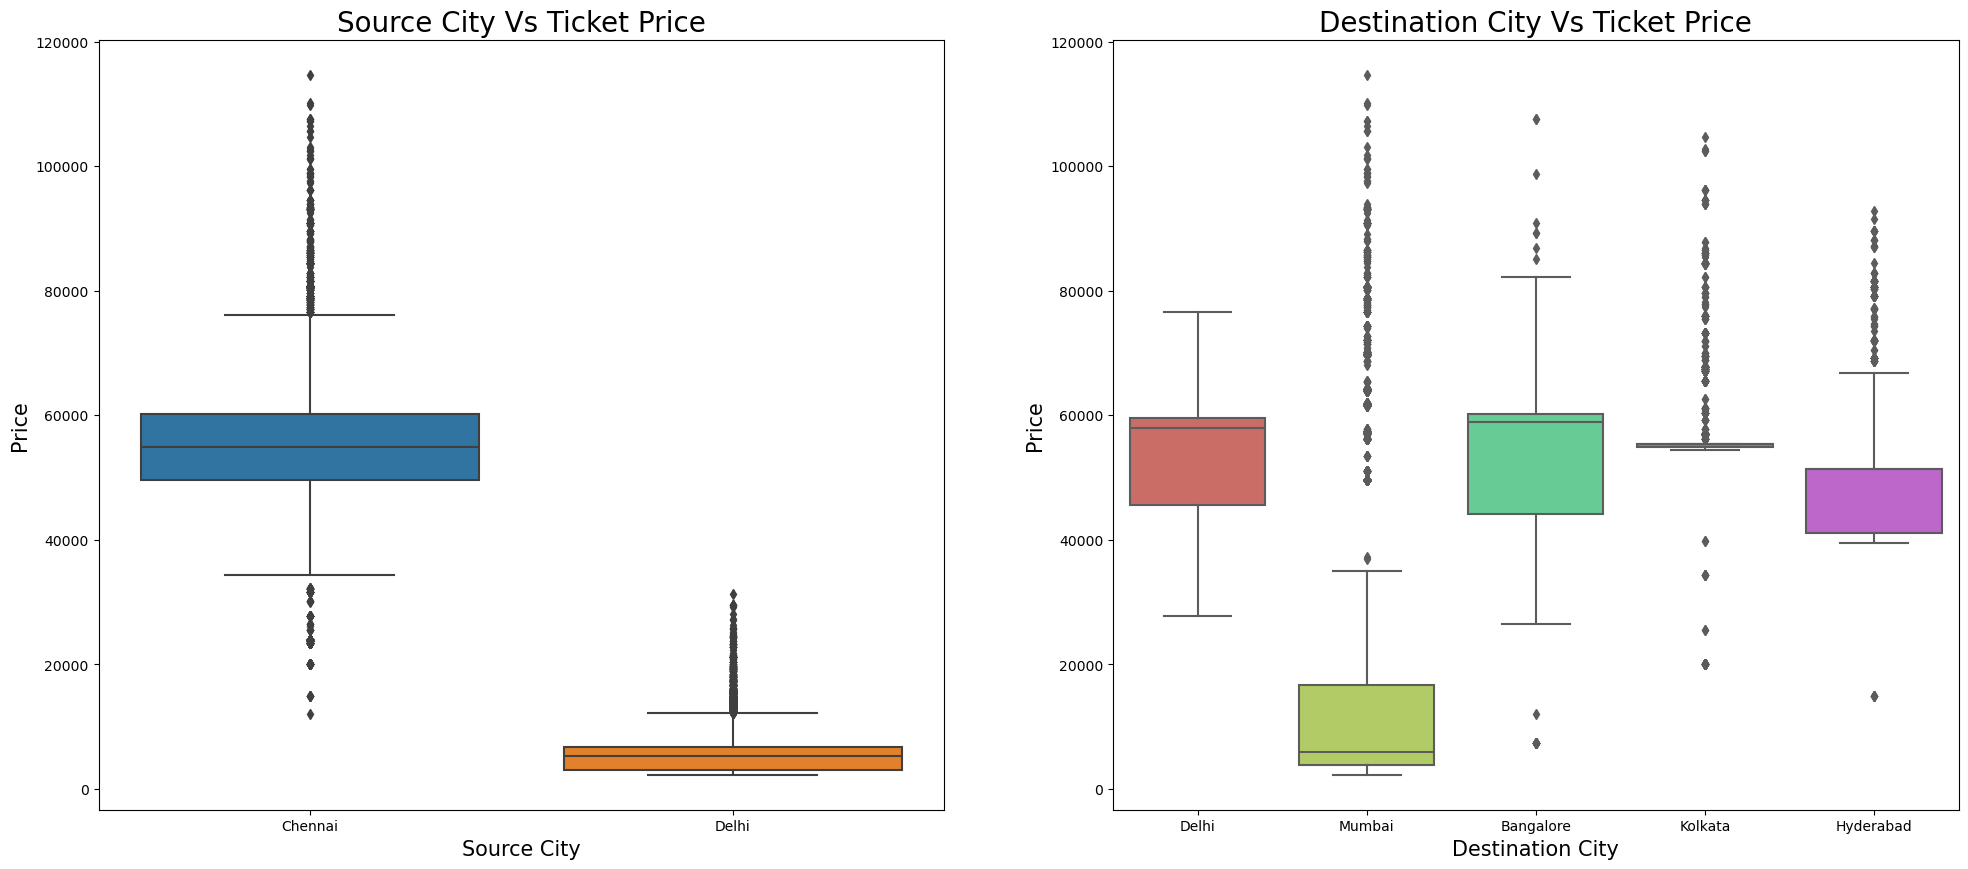

In [45]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

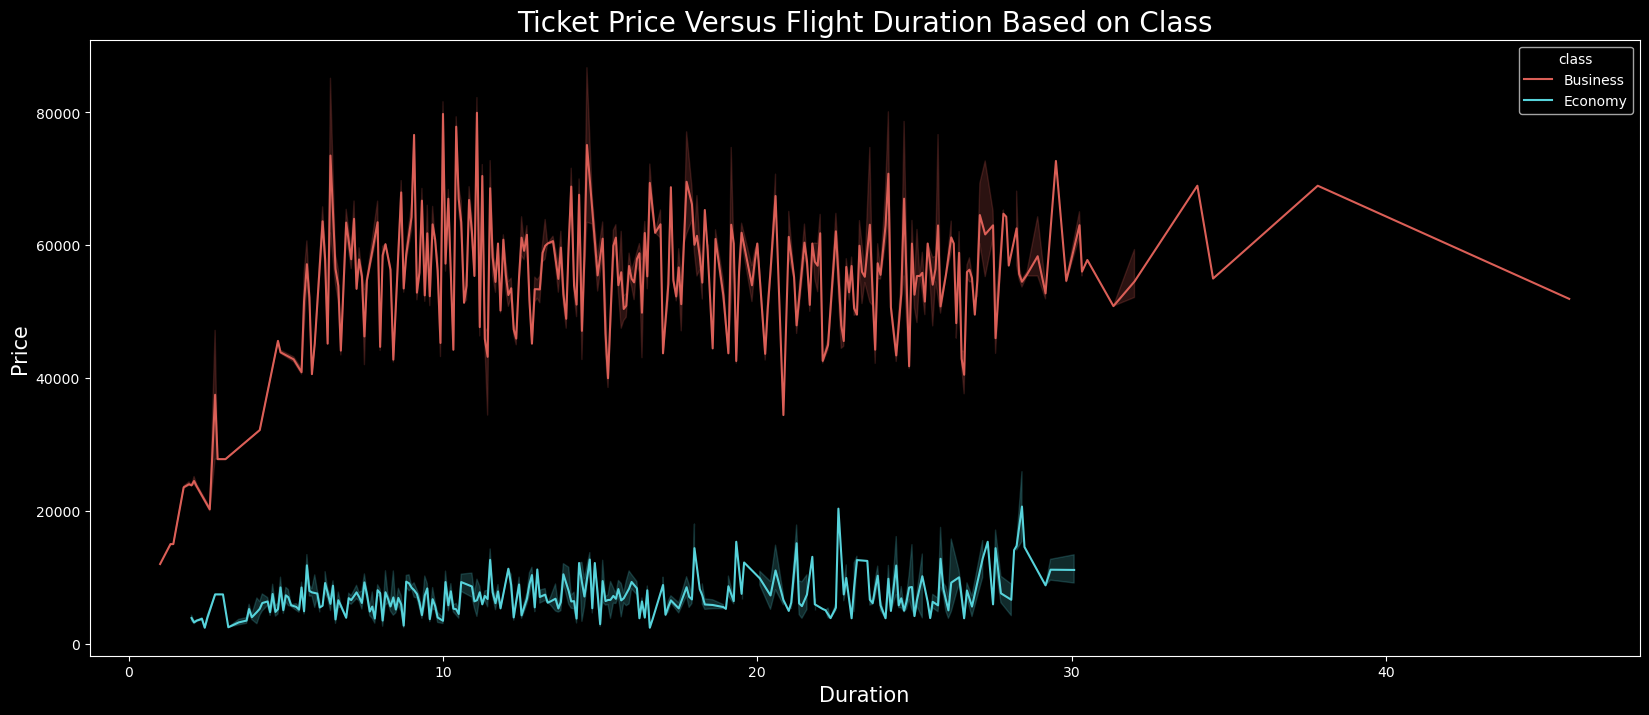

In [46]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [47]:
#Total number of Flights from one city to another
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Chennai,Bangalore,19
1,Chennai,Delhi,15
2,Chennai,Hyderabad,16
3,Chennai,Kolkata,17
4,Chennai,Mumbai,19
5,Delhi,Bangalore,18
6,Delhi,Mumbai,260


In [48]:
#Average Price of different Airlnes from Source city to Destination city
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Delhi,Bangalore,7424.000000
1,AirAsia,Delhi,Mumbai,3981.191456
2,Air_India,Chennai,Bangalore,56733.854749
3,Air_India,Chennai,Delhi,40815.800000
4,Air_India,Chennai,Hyderabad,50870.054264
5,Air_India,Chennai,Kolkata,54365.963357
6,Air_India,Chennai,Mumbai,48780.453267
7,Air_India,Delhi,Bangalore,7425.000000
8,Air_India,Delhi,Mumbai,6996.975881
9,GO_FIRST,Delhi,Mumbai,5762.211515


In [49]:
# Creating a Back up File
df_bk=df.copy()


In [50]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [51]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

In [52]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((14000, 10), (6000, 10), (14000,), (6000,))

In [53]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [54]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [69]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# Initialize the models
modelmlg = LinearRegression()  
modelrfr = RandomForestRegressor() 

# List of models
MM = [modelmlg, modelrfr]

# Initialize an empty DataFrame to store results
Results = pd.DataFrame(columns=['Model Name', 'Mean_Absolute_Error_MAE', 'Adj_R_Square', 
                                'Root_Mean_Squared_Error_RMSE', 'Mean_Absolute_Percentage_Error_MAPE',
                                'Mean_Squared_Error_MSE', 'Root_Mean_Squared_Log_Error_RMSLE', 'R2_score'])

# Define the function to calculate MAPE(Mean Absolute Percentage Error)
def MAPE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation loop for all models
for models in MM:
    
    # Fit the model with training data
    models.fit(x_train, y_train)
    
    # Predict the model with test data
    y_pred = models.predict(x_test)
    
    # Print model name
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))
    
    # Calculate MAPE
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values
    r_squared = round(metrics.r2_score(y_test, y_pred), 6)
    adjusted_r_squared = round(1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1), 6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')

    # Create a new row for the current model's metrics
    new_row = {
        'Model Name': str(models),
        'Mean_Absolute_Error_MAE': metrics.mean_absolute_error(y_test, y_pred),
        'Adj_R_Square': adjusted_r_squared,
        'Root_Mean_Squared_Error_RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'Mean_Absolute_Percentage_Error_MAPE': result,
        'Mean_Squared_Error_MSE': metrics.mean_squared_error(y_test, y_pred),
        'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
        'R2_score': metrics.r2_score(y_test, y_pred)
    }
    
    # Use pd.concat to append the new row to Results DataFrame
    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)

# Display final results
print(Results)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 5566.846
Mean Squared Error (MSE): 65691744.642
Root Mean Squared Error (RMSE): 8105.044
R2_score: 0.900809
Root Mean Squared Log Error (RMSLE): 9.0
Mean Absolute Percentage Error (MAPE): 42.2 %
Adj R Square:  0.900643
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 2110.027
Mean Squared Error (MSE): 24784387.122
Root Mean Squared Error (RMSE): 4978.392
R2_score: 0.962577
Root Mean Squared Log Error (RMSLE): 8.513
Mean Absolute Percentage Error (MAPE): 10.43 %
Adj R Square:  0.962515
------------------------------------------------------------------------------------------------------------
                Model Name  Mean_Absolute_Error_MAE  Adj_R_Square  \
0       LinearRegression()              5566.846483      0.900643   
1  RandomForestRegressor()              2110.026760      0.962515   

   Root_Me

In [70]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),5566.846483,0.900643,8105.044395,42.197877,6.569174e+07,9.000242,0.900809
1,RandomForestRegressor(),2110.026760,0.962515,4978.392022,10.433412,2.478439e+07,8.512862,0.962577


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for LinearRegression (removing 'normalize')
param_grid_linear = {
    'fit_intercept': [True, False],  
    'copy_X': [True, False]          # Another possible parameter for LinearRegression.
}

# Define the parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 500],  # Reduce the range of estimators
    'max_depth': [10, 20],       # Focus on a smaller set of depth values
    'min_samples_split': [2, 5], # Limit the number of split candidates 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


modelmlg = LinearRegression()  
modelrfr = RandomForestRegressor() 

# GridSearch for Linear Regression
grid_search_lr = GridSearchCV(estimator=modelmlg, 
                              param_grid=param_grid_linear, 
                              cv=3, 
                              scoring='neg_mean_squared_error', 
                              n_jobs=-1, 
                              verbose=2)

# GridSearch for RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=modelrfr, 
                              param_grid=param_grid_rf, 
                              cv=3, 
                              scoring='neg_mean_squared_error', 
                              n_jobs=-1, 
                              verbose=2)

# Fit GridSearchCV to the training data for both models
grid_search_lr.fit(x_train, y_train)
grid_search_rf.fit(x_train, y_train)

# Get the best parameters for both models
best_params_lr = grid_search_lr.best_params_
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print("Best hyperparameters for LinearRegression:", best_params_lr)
print("Best hyperparameters for RandomForestRegressor:", best_params_rf)

# Use the best estimators to make predictions on the test set
best_lr_model = grid_search_lr.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

# Predict the test set results for both models
y_pred_lr = best_lr_model.predict(x_test)
y_pred_rf = best_rf_model.predict(x_test)

# Evaluation metrics for Linear Regression
print("Linear Regression Results:")
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('R2_score:', r2_score(y_test, y_pred_lr))
print("--------------------------------------------------")

# Evaluation metrics for Random Forest Regressor
print("Random Forest Results:")
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('R2_score:', r2_score(y_test, y_pred_rf))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for LinearRegression: {'copy_X': True, 'fit_intercept': True}
Best hyperparameters for RandomForestRegressor: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Linear Regression Results:
Mean Absolute Error (MAE): 5566.8464831543315
Mean Squared Error (MSE): 65691744.64227705
Root Mean Squared Error (RMSE): 8105.0443948369
R2_score: 0.9008092803592094
--------------------------------------------------
Random Forest Results:
Mean Absolute Error (MAE): 2058.2966737011207
Mean Squared Error (MSE): 24088146.200333253
Root Mean Squared Error (RMSE): 4907.967624214045
R2_score: 0.9636282980542742


In [72]:
#Trainig the model with
modelrfr.fit(x_train, y_train)

#Predict the model with test data
y_pred = modelrfr.predict(x_test)

In [73]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [103]:
result.sample(10)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
290848,Vistara,UK-834,Chennai,Evening,one,Night,Mumbai,Business,6.67,10,61873,61873,78428.93
5568,Indigo,6E-2097,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,7.58,29,2463,2463,2808.28
297254,Air_India,AI-440,Chennai,Early_Morning,one,Night,Kolkata,Business,16.17,31,55377,55377,55860.84
298404,Vistara,UK-832,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.08,11,51457,51457,51457.00
295609,Air_India,AI-539,Chennai,Evening,one,Afternoon,Bangalore,Business,19.50,43,60260,60260,60260.00
286,Indigo,6E-2046,Delhi,Evening,zero,Evening,Mumbai,Economy,2.17,3,8370,8370,7142.12
6321,Vistara,UK-871,Delhi,Night,one,Afternoon,Mumbai,Economy,17.92,32,5227,5227,5627.55
292983,Vistara,UK-832,Chennai,Early_Morning,one,Evening,Mumbai,Business,12.17,42,57393,57393,59919.39
298695,Air_India,AI-538,Chennai,Night,one,Morning,Hyderabad,Business,15.58,18,51345,51345,53071.26
4202,Vistara,UK-747,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,6.50,22,7575,7575,7086.75


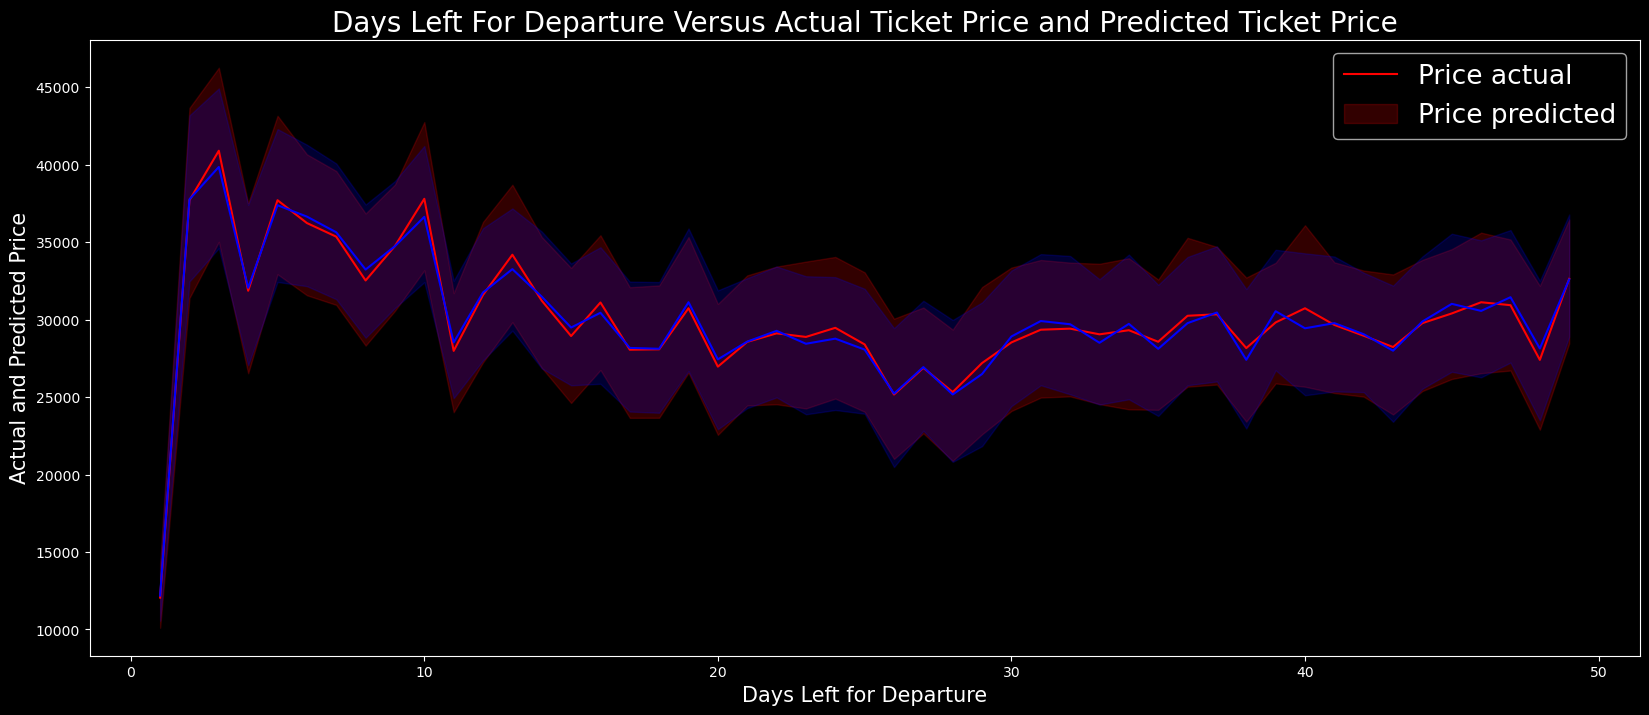

In [75]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()